<a href="https://colab.research.google.com/github/SimonBestHacker/DataCon2024/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.4 MB/s eta 0:00:00


In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from Bio.SeqUtils import molecular_weight

In [477]:
df = pd.read_csv('poseidon_cleaned.csv', sep=';', encoding = 'Windows-1252')

Информация про наш датасет

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Peptide      2373 non-null   object 
 1   Cell line    2360 non-null   object 
 2   Cargo        2308 non-null   object 
 3   PubmedID     2374 non-null   int64  
 4   Uptake       2374 non-null   object 
 5   Units        2336 non-null   object 
 6   Conc.        2146 non-null   object 
 7   Time         2277 non-null   object 
 8   Temp.        1723 non-null   object 
 9   Method       2365 non-null   object 
 10  Type         2363 non-null   object 
 11  Sequence     2370 non-null   object 
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
dtypes: float64(5), int64(1), object(11)
memory usage: 315.4+ KB


Считаем, сколько без значений

In [150]:
df.isna().sum()

373

Удаляем столбцы Unnamed

In [479]:
for k in range(12,17):
  df.drop('Unnamed: '+str(k), axis= 1 , inplace= True)

Парсим значения Uptake'ов

In [480]:
def parse_uptake(s):
  s = str(s)
  if '<' in s:
    return str(float(s.split('<')[1])-float(s.split('<')[1])/2)
  elif '±' in s:
    return s.split('±')[0]
  else:
    return s

In [481]:
df["Uptake"] = df["Uptake"].apply(lambda x: parse_uptake(x))
df['Uptake'] = df["Uptake"].apply(lambda x: x.replace(',','.'))
df['Uptake'] = df["Uptake"].apply(lambda x: float(x))

Смотрим повторения единиц измерения Uptake'ов

In [ ]:
with pd.option_context("display.max_rows", None):
    display(df.groupby(['Units'])['Uptake'].count().sort_values(ascending=False))

Units
Mean Fluorescence intensity                                                                                                       478
Fluorescence intensity                                                                                                            381
Cellular uptake                                                                                                                   184
Cellular uptake (%)                                                                                                               105
Relative fluorescence                                                                                                              90
% Positive cells                                                                                                                   89
Relative Cellular uptake                                                                                                           84
Microscopic fluorescence intensity                      

Чистим строки с пустой концентрацией

In [482]:
df= df.dropna(subset=['Conc.'])
#df= df.dropna(subset=['Uptake'])

Смотрим возможные значения единиц измерения для средней интенсивности флюоресценции

In [392]:
df1 = df.copy()

In [483]:
df2 = df[df.values  == "Fluorescence intensity"]
df2

,Peptide,Cell line,Cargo,PubmedID,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
173,Inv1,HeLa cells,(FITC)-labeled latex microspheres,16620748,47.5,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,VNADIKATTVFGGKYVSLTTP
174,Inv2,HeLa cells,(FITC)-labeled latex microspheres,16620748,104.5,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,GKYVSLTTPKNPTKRRITPKDV
175,Inv3,HeLa cells,(FITC)-labeled latex microspheres,16620748,607.5,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,TKRRITPKDVIDVRSVTTEINT
176,Inv4,HeLa cells,(FITC)-labeled latex microspheres,16620748,104.5,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,RSVTTEINTLFQTLTSIAEKVDP
177,Inv5,HeLa cells,(FITC)-labeled latex microspheres,16620748,626.5,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,AEKVDPVKLNLTLSAAAEALTGLGDK
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,HPRP-A1-iRGD,A549 cells,FITC,29396568,35.0,Fluorescence intensity,16uM,100s,37ºC,Flow cytometry,Cellular uptake,FKKLKKLFSKLWNWKCRGDKGPDC
2323,TAT-ASA-MNP-CDDP,HNE-1 cells,FITC,30826059,1800.0,Fluorescence intensity,5ug/ml,2h,NaN,Flow cytometry,Intracellular uptake,YGRKKRRQRRR
2324,TAT-ASA-MNP-CDDP,CNE-2 cells,FITC,30826059,800.0,Fluorescence intensity,5ug/ml,2h,NaN,Flow cytometry,Intracellular uptake,YGRKKRRQRRR
2371,Inv3,HeLa cells,(FITC)-labeled latex microspheres,16620748,2400.0,Fluorescence intensity,0.05 umol,NaN,37ºC,Flow cytometry,Uptake,TKRRITPKDVIDVRSVTTEINT


Приводим значения к одним единицам измерения

In [484]:
def add_values(row):
  def calculator(number, units):
      if ('ug/ml' == units) or ('ug' == units):
        #print(number, units)
        try:
          mol_weight = molecular_weight(row['Sequence'], seq_type='protein')
          number = number * 10**(-6)/float(mol_weight)
          #print(row['Sequence'])
          return float(number)
        except:
          return -1
      elif ('um'== units) or ('umol/l'== units) or ('umol'== units):
          return float(number)
      elif ('nm' == units):
          return float(number*10**(3))
      elif 'mg/ml' == units:
        try:
          mol_weight = molecular_weight(row['Sequence'], seq_type='protein')
          number = number * 10**(-3)/mol_weight
          return float(number)
        except:
          return -1
      else:
          return -1

  def parse_concentration(s):
      s = str(s)
      if 'charge ratio' in s.lower():
        return -1
      else:
        pattern = r'(\d*\.?\d+)\s*([a-zA-Z/^\d]*)'
        match = re.match(pattern, s)
        if match:
          number = float(match.group(1))
          unit = match.group(2).lower().replace(' ','')
          #print(number, unit)
          y = calculator(number, unit)
          return y

  x = parse_concentration(row['Conc.'])
  return x

df1 = pd.DataFrame()
df1['Conc.'] = df2.apply(add_values, axis = 1)

#df[df.values  == "Mean Fluorescence intensity"]['Conc.'].apply(lambda x: parse_concentration(x))

In [488]:
df2.update(df1)
df2['Conc.'] = df2['Conc.'].apply(lambda x: float(x))

<ipython-input-488-2b5f0e8b1558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Conc.'] = df2['Conc.'].apply(lambda x: float(x))


In [489]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 173 to 2372
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peptide    356 non-null    object 
 1   Cell line  356 non-null    object 
 2   Cargo      351 non-null    object 
 3   PubmedID   356 non-null    int64  
 4   Uptake     356 non-null    float64
 5   Units      356 non-null    object 
 6   Conc.      356 non-null    float64
 7   Time       335 non-null    object 
 8   Temp.      292 non-null    object 
 9   Method     356 non-null    object 
 10  Type       356 non-null    object 
 11  Sequence   356 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 44.3+ KB


In [490]:
condition = df2['Conc.'] < 0
df_filtered = df2[~condition]
df_filtered

,Peptide,Cell line,Cargo,PubmedID,Uptake,Units,Conc.,Time,Temp.,Method,Type,Sequence
173,Inv1,HeLa cells,(FITC)-labeled latex microspheres,16620748,47.5,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,VNADIKATTVFGGKYVSLTTP
174,Inv2,HeLa cells,(FITC)-labeled latex microspheres,16620748,104.5,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,GKYVSLTTPKNPTKRRITPKDV
175,Inv3,HeLa cells,(FITC)-labeled latex microspheres,16620748,607.5,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,TKRRITPKDVIDVRSVTTEINT
176,Inv4,HeLa cells,(FITC)-labeled latex microspheres,16620748,104.5,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,RSVTTEINTLFQTLTSIAEKVDP
177,Inv5,HeLa cells,(FITC)-labeled latex microspheres,16620748,626.5,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,AEKVDPVKLNLTLSAAAEALTGLGDK
...,...,...,...,...,...,...,...,...,...,...,...,...
2306,HPRP-A1-iRGD,A549 cells,FITC,29396568,35.0,Fluorescence intensity,1.600000e+01,100s,37ºC,Flow cytometry,Cellular uptake,FKKLKKLFSKLWNWKCRGDKGPDC
2323,TAT-ASA-MNP-CDDP,HNE-1 cells,FITC,30826059,1800.0,Fluorescence intensity,3.205482e-09,2h,NaN,Flow cytometry,Intracellular uptake,YGRKKRRQRRR
2324,TAT-ASA-MNP-CDDP,CNE-2 cells,FITC,30826059,800.0,Fluorescence intensity,3.205482e-09,2h,NaN,Flow cytometry,Intracellular uptake,YGRKKRRQRRR
2371,Inv3,HeLa cells,(FITC)-labeled latex microspheres,16620748,2400.0,Fluorescence intensity,5.000000e-02,NaN,37ºC,Flow cytometry,Uptake,TKRRITPKDVIDVRSVTTEINT


In [492]:
res = pd.DataFrame()
res['Uptake'] = df_filtered['Uptake']
res['Conc.'] = df_filtered['Conc.']
res['Sequence'] = df_filtered['Sequence']
res['Effectiveness'] = df_filtered['Uptake'] / df_filtered['Conc.']
res

,Uptake,Conc.,Sequence,Effectiveness
173,47.5,5.000000e-02,VNADIKATTVFGGKYVSLTTP,9.500000e+02
174,104.5,5.000000e-02,GKYVSLTTPKNPTKRRITPKDV,2.090000e+03
175,607.5,5.000000e-02,TKRRITPKDVIDVRSVTTEINT,1.215000e+04
176,104.5,5.000000e-02,RSVTTEINTLFQTLTSIAEKVDP,2.090000e+03
177,626.5,5.000000e-02,AEKVDPVKLNLTLSAAAEALTGLGDK,1.253000e+04
...,...,...,...,...
2306,35.0,1.600000e+01,FKKLKKLFSKLWNWKCRGDKGPDC,2.187500e+00
2323,1800.0,3.205482e-09,YGRKKRRQRRR,5.615380e+11
2324,800.0,3.205482e-09,YGRKKRRQRRR,2.495724e+11
2371,2400.0,5.000000e-02,TKRRITPKDVIDVRSVTTEINT,4.800000e+04


In [493]:
res['Sequence'].unique()

array(['VNADIKATTVFGGKYVSLTTP', 'GKYVSLTTPKNPTKRRITPKDV',
       'TKRRITPKDVIDVRSVTTEINT', 'RSVTTEINTLFQTLTSIAEKVDP',
       'AEKVDPVKLNLTLSAAAEALTGLGDK', 'GLGDKFGESIVNANTVLDDLNSRMPQSRHDIQQL',
       'GDVYADAAPDLFDFLDSSVTTARTINA', 'ARTINAQQAELDSALLAAAGFGNTTADVFDRG',
       'ADVFDRGGPYLQRGVADLVPTATLLDTYSP', 'LDTYSPELFCTIRNFYDADRPDRGAAA',
       'TKRRITPDDVIDVRSVTTEINT', 'TKRRITPKKVIDVRSVTTEINT',
       'TKRRITPKDVIDVRSVTTKINT', 'TKRRITPKDVIDV',
       'TKRRITPKDVIDVESVTTEINT', 'TARRITPKDVIDVRSVTTEINT',
       'TKAARITPKDVIDVRSVTTEINT', 'HHHHHHTKRRITPKDVIDVRSVTTEINT',
       'KLWMRWYSPTTRRYG', 'RLWMRWYSPTTRRYG', 'KLWMRWYSATTRRYG',
       'KLWMRWYSPWTRRYG', 'RLWMRWYSPWTRRYG', 'RLWMRWYSPWTRRWG',
       'ALWMRWYSPTTRRYG', 'RAWMRWYSPTTRRYG', 'RLAMRWYSPTTRRYG',
       'RLWARWYSPTTRRYG', 'RLWMAWYSPTTRRYG', 'RLWMRAYSPTTRRYG',
       'RLWMRWASPTTRRYG', 'RLWMRWYAPTTRRYG', 'RLWMRWYSPATRRYG',
       'RLWMRWYSPTARRYG', 'RLWMRWYSPTTARYG', 'RLWMRWYSPTTRAYG',
       'RLWMRWYSPTTRRAG', 'RLWMRWYSPTTRRYA'

In [494]:
def count_letters(word):
    # Инициализация пустого словаря для хранения количества букв
    letter_count = {}

    # Перебор каждого символа в строке
    for char in word:
        # Проверяем, является ли символ буквой
        if char.isalpha():
            # Приводим букву к нижнему регистру для учета регистра
            char = char.lower()
            # Увеличиваем счетчик буквы в словаре
            if char in letter_count:
                letter_count[char] += 1
            else:
                letter_count[char] = 1

    return letter_count

# Пример использования
text = "GPLGIAGQrrrrrrrrr"
letter_count = count_letters(text)
print("Количество букв в строке:", letter_count)

Количество букв в строке: {'g': 3, 'p': 1, 'l': 1, 'i': 1, 'a': 1, 'q': 1, 'r': 9}


In [508]:
sequnce_list = []
letters = []
sequnce_list = res['Sequence'].to_list()
for word in sequnce_list:
  letters.append(count_letters(word))

for i in range(0,len(letters)-1):
  for key in item[i]:
    for key in item[i+1]:
      if

[{'v': 3, 'n': 1, 'a': 2, 'd': 1, 'i': 1, 'k': 2, 't': 4, 'f': 1, 'g': 2, 'y': 1, 's': 1, 'l': 1, 'p': 1}, {'g': 1, 'k': 4, 'y': 1, 'v': 2, 's': 1, 'l': 1, 't': 4, 'p': 3, 'n': 1, 'r': 2, 'i': 1, 'd': 1}, {'t': 5, 'k': 2, 'r': 3, 'i': 3, 'p': 1, 'd': 2, 'v': 3, 's': 1, 'e': 1, 'n': 1}, {'r': 1, 's': 2, 'v': 2, 't': 5, 'e': 2, 'i': 2, 'n': 1, 'l': 2, 'f': 1, 'q': 1, 'a': 1, 'k': 1, 'd': 1, 'p': 1}, {'a': 5, 'e': 2, 'k': 3, 'v': 2, 'd': 2, 'p': 1, 'l': 5, 'n': 1, 't': 2, 's': 1, 'g': 2}, {'g': 3, 'l': 4, 'd': 4, 'k': 1, 'f': 1, 'e': 1, 's': 3, 'i': 2, 'v': 2, 'n': 3, 'a': 1, 't': 1, 'r': 2, 'm': 1, 'p': 1, 'q': 3, 'h': 1}, {'g': 1, 'd': 5, 'v': 2, 'y': 1, 'a': 5, 'p': 1, 'l': 2, 'f': 2, 's': 2, 't': 3, 'r': 1, 'i': 1, 'n': 1}, {'a': 8, 'r': 2, 't': 3, 'i': 1, 'n': 2, 'q': 2, 'e': 1, 'l': 3, 'd': 3, 's': 1, 'g': 3, 'f': 2, 'v': 1}, {'a': 3, 'd': 4, 'v': 3, 'f': 1, 'r': 2, 'g': 3, 'p': 3, 'y': 2, 'l': 4, 'q': 1, 't': 3, 's': 1}, {'l': 2, 'd': 4, 't': 2, 'y': 2, 's': 1, 'p': 2, 'e': 1, 'f':

Гистограмма распределения значений по единицам измерений uptake'ов

103


array(['Mean Fluorescence intensity',
       'pmol internalized peptide / mg protein',
       'OD (optical density values)',
       '% Absorbance relative to peptide 1 (405 nm)',
       '% Intracellular fluorescence of CyLoP-1', 'pg PO/ 1000 cells',
       'Cellular uptake (%)', 'Fluorescence intensity',
       'pmol/mg protein Cellular uptake', 'Intracellular Fluorescence',
       'Fluorescence (fold/basal)', 'Fluorescence intensity (%)',
       'Geo Mean Fluorescence intensity', 'Mnlog FITC', 'nmol/mg protein',
       'Fold Change in GeoMean Fluorescence of control sample',
       'Mean Fluorescence intensity/mg protein',
       'Relative Cellular uptake',
       '% Amount transported into basolateral fluid', 'RFU/mg',
       'pmol/ug total protein', 'pmol siRNA / mg protein',
       'Mean Fluorescence intensity/cell', 'Cellular uptake',
       'Plasma insulin concentration (uU/mL)', '% Transfection',
       'Median Fluorescence intensity', 'Median Normalized Fluorescence',
       'F

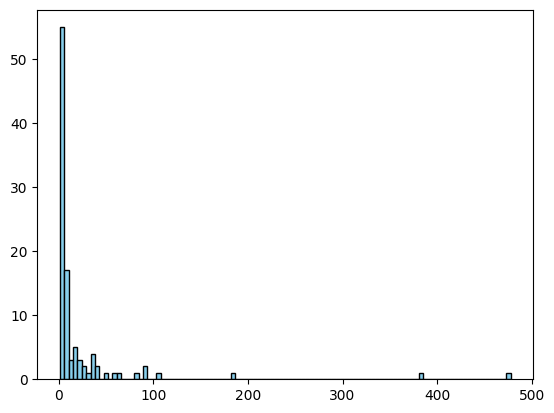

In [ ]:
x = df['Units'].unique()
bin = len(x)
print(len(x))
with pd.option_context("display.max_rows", None):
    display(x)

n = df.groupby(['Units'])['Uptake'].count().to_list()
plt.hist(n, bins=bin, color='skyblue', edgecolor='black')
plt.show()
#plt.plot(df.groupby(['Units'])['Uptake'].to_list(), x.sum)

Чистим txt-файл с исходным датасетом

In [ ]:
def is_number(x):
  try:
    float(x)
    return True
  except ValueError:
      return False
    #print("Что-то не то")


In [ ]:
new_lines = []

with open('file.txt', 'r', encoding = 'Windows-1252') as file:
    content = file.readlines()
    for line in range(1,len(content)):
      row = re.split(r'(?<!"),(?!")', content[line].strip())
      #print(row)
      if (is_number(row[3])) == False:
        while is_number(row[3]) != True:
          row[2] = row[2]+row[3]
          del row[3]
          #print(row)
       #if ()
      if (is_number(row[5])) == True:
        row[4] = row[4]+'.'+row[5]
        del row[5]
      new_lines.append(row)
      print(row)


with open('new_file.txt', 'w', encoding = 'Windows-1252') as file:
  for l in new_lines:
    for m in range(0,len(l)):
      if m == len(l)-1:
        file.write(l[m])
      else:
        file.write(l[m]+',')
    file.write('\n')


['Tat (49-57)', 'Jurkat cells', 'Fluorescein', '11087855', '650', 'Mean Fluorescence intensity', '12.5 uM', '15 min', '23ºC', 'Flow cytometry', 'Cellular uptake', 'RKKRRQRRR']
['Tat (49-56)', 'Jurkat cells', 'Fluorescein', '11087855', '31.25', 'Mean Fluorescence intensity', '12.5 uM', '10 min', '23ºC', 'Flow cytometry', 'Cellular uptake', 'RKKRRQRR']
['Tat (49-55)', 'Jurkat cells', 'Fluorescein', '11087855', '10', 'Mean Fluorescence intensity', '12.5 uM', '10 min', '23ºC', 'Flow cytometry', 'Cellular uptake', 'RKKRRQR']
['Tat (50-57)', 'Jurkat cells', 'Fluorescein', '11087855', '22.5', 'Mean Fluorescence intensity', '12.5 uM', '10 min', '23ºC', 'Flow cytometry', 'Cellular uptake', 'KKRRQRRR']
['Tat (51-57)', 'Jurkat cells', 'Fluorescein', '11087855', '20', 'Mean Fluorescence intensity', '12.5 uM', '10 min', '23ºC', 'Flow cytometry', 'Cellular uptake', 'KRRQRRR']
['D-Tat (49-57)', 'Jurkat cells', 'Fluorescein', '11087855', '1800', 'Mean Fluorescence intensity', '12.5 uM', '15 min', '23º

In [351]:
def count_letters(word):
    # Инициализация пустого словаря для хранения количества букв
    letter_count = {}

    # Перебор каждого символа в строке
    for char in word:
        # Проверяем, является ли символ буквой
        if char.isalpha():
            # Приводим букву к нижнему регистру для учета регистра
            char = char.lower()
            # Увеличиваем счетчик буквы в словаре
            if char in letter_count:
                letter_count[char] += 1
            else:
                letter_count[char] = 1

    return letter_count

# Пример использования
text = "Hello, World!"
letter_count = count_letters(text)
print("Количество букв в строке:", letter_count)

Количество букв в строке: {'h': 1, 'e': 1, 'l': 3, 'o': 2, 'w': 1, 'r': 1, 'd': 1}
